## 언어모델
- 어떤 단어들의 시퀀스(문장)가 일어날 가능성을 예측하는 방법
    - Ex) 'you say goodbye'와 'you say die'라는 두 문장의 출현 확률은?

확률적 관점
- 문장 내 단어 $w_1, w_2, ... , w_m$

#### 어떤 문장이 등장할 확률 : $P(w_1, w_2, ... , w_m)$
#### 확률의 곱셈정리: $P(A,B) = P(A|B)P(B)$
    - 여기서 P(A,B)는 결합확률, P(A|B)는 사후확률, P(B)는 사전확률
    - A와 B가 동시에 발생할 확률 = B가 일어나고 A가 일어날 확률 x B가 일어날 확률
    - 확률 곱셈정리에 따른 m개의 단어를 갖는 문장의 출현 확률

#### $P(w_1, w_2, ... , w_m) = P(w_m | w_1, w_2, ..., w_{m-1})P(w_{m-1} | w_1, w_2, ..., w_{m-2})...P(w_1)\\
 = \prod_{t=1}^{m}P(w_t | w_1, w_2, ... , w_t-1)$

- 여기서 $P(w_1, w_2, ... , w_m-1) = P(A)$라고 가정하면    

#### $P(w_1, w_2, ... , w_m) = P(A, w_m) = P(w_m | A)P(A)$

- $P(w_1, w_2, ... , w_m-2) = P(\acute{A})$ 라고 하면

#### $P(w_1, w_2, ... , w_{m-1}) = P(\acute{A}, w_{m-1}) = P(w_{m-1} | \acute{A})P(\acute{A})$

- 위와같은 형식으로 시퀀스 결합확률을 시점을 하나씩 줄여나가면서 사후확률 형태로 분해할 수 있으며
- 모든 사후확률의 총곱이 결국 해당 시퀀스의 출현확률을 계산할 수 있게 한다


<br >

### 언어모델 관점에서 바라본 CBOW와 시퀀스 출현확률
- CBOW는 window_size에 따라서 target주변의 맥락을 이용하여 target의 출현확률을 구한다고 볼 수 있으며
- 결국 P(target | contexts)를 이용하여 전체 시퀀스 출현확률을 구할 수 있다 (근사)

#### 윈도우크기가 2 일 때의 시퀀스 출현확률 $P(w_1, w_2, ... , w_{m-1}) \approx \prod_ {t=1}^{m} P(w_t | w_{t-1}, w_{t-2})$

- 그런데 시퀀스 길이가 길어질수록 정확한 시퀀스 출현확률 예측을 위해서는 window_size가 커질 수 밖에 없고
- 설령 window_size가 커진다 하더라도 우측의 정보, 혹은 좌우 단어 정보 외 나머지 단어들의 정보가 반영될 수 없다
- 또한 단어들의 출현 순서에 관계없이 결합확률을 계산하기 때문에 P(say, hi), P(hi, say)는 결국 같은 확률을 취하게 된다. 즉 진정한 의미의 맥락을 반영하기 어렵다

## RNN
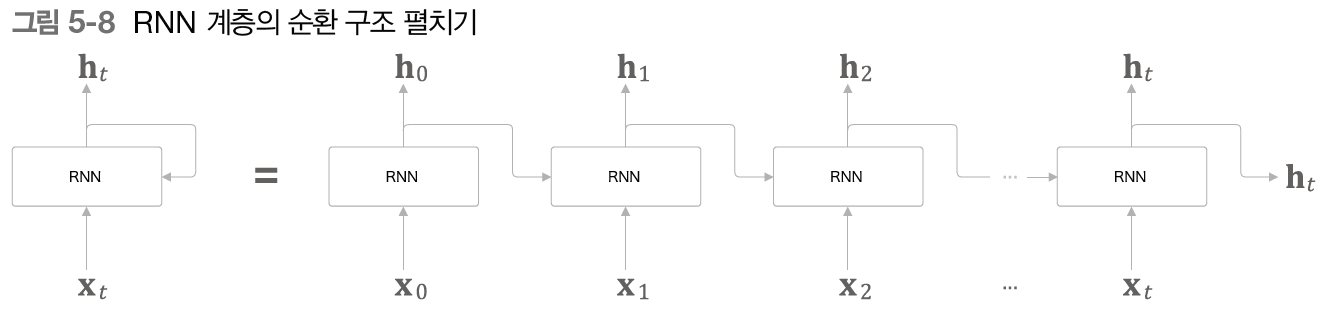
- Feedforward네트워크와 다르게 데이터의 흐름이 일방향으로 진행되지 않는 구조
- 입력 $x_t$는 t시점(시간)의 시계열 데이터를 의미하며
- 출력 $h_t$는 t시점(시간)의 RNN층을 거친 출력
- 여기서 $h_t$는 $x_t$가 RNN층을 거쳐서 2개로 분기된 출력중 하나를 그대로 받은 것을 의미
- 나머지 분기된 $h_t$는 다시 RNN층으로 돌아가 정보를 갱신하는 역할을 수행한다

**$h_t$계산 과정**    
#### $h_t = tanh(h_{t-1}W_h + x_tW_x + b)$
- 총 갱신되어야 하는 parameters는 Wx, Wh, b
- 여기서 $h_{t-1}$는 이전 시점의 입력으로부터 출력된 데이터이며, $W_h$는 그에 대응되는 가중치
- $W_x$는 현재 시점의 입력 $x_t$에 대응되는 가중치
- 마지막으로 b는 편향
- 이 때 $h_t, x_t$는 모두 벡터 형태
- 현재 시점의 출력이 이전 시점의 출력을 참조하므로 학습이 진행될 수록 이전 모든 시점들을 참조하게 되는 효과를 가지게 되는 것

### BPTT, Truncated BPTT
1) BPTT
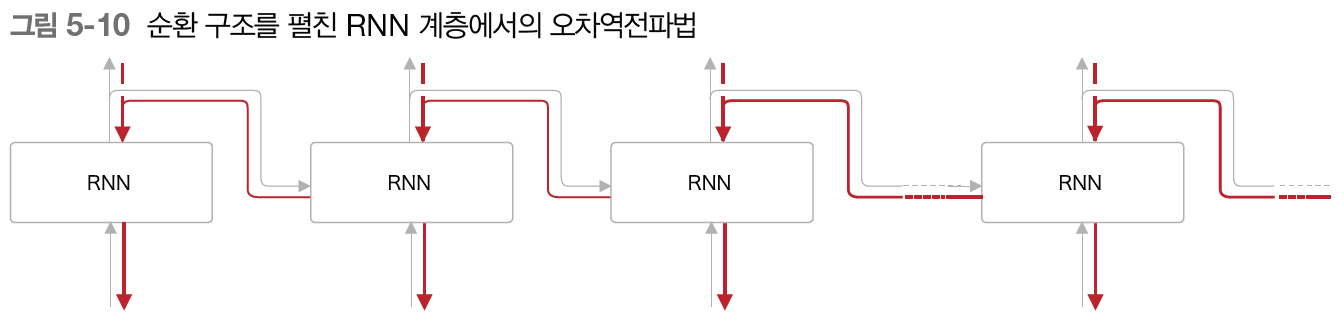
- BPTT는 RNN에서 사용되는 역전파 기법이며, 시간 개념을 역전파에 도입한 것이다
- RNN은 이용하는 input 시계열 데이터의 크기, 즉 시간적 길이에 따라서 계산량이 비례한다
- 매우 큰 연산량, 컴퓨팅 자원을 요하게 되므로 효율적인 역전파를 수행할 수 있는 방식이 필요로 해졌다

2) Truncated BPTT   
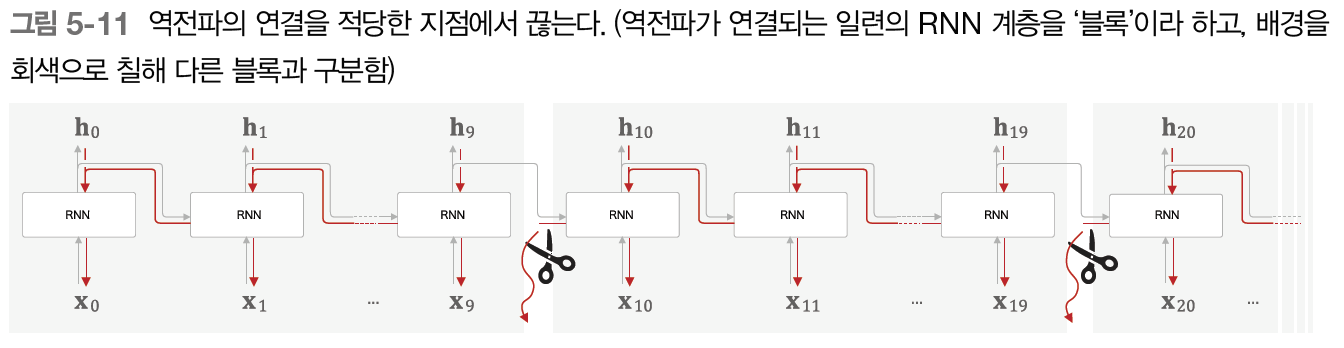
- 효율적인 BPTT를 수행하기 위해 역전파 연산을 **블록단위**로 끊는 기법 Truncated BPTT등장
- 중요한 것은 계층들의 순전파를 끊지 않고 오직 **역전파만을 블록단위로 끊는**방법을 취함
- 이렇게 블록단위로 순전파 및 역전파를 수행할 때 미니배치도 위와 같은 방식을 따라 진행하여야 한다    
    ex) 1000개의 단어로 구성된 corpus에서 10단어씩 학습을 구성하고자 하는 모델에서 batch_size를 2로 잡으면
    
    - 입력데이터들이 모두 순서대로 입력되어야 하고 -> x1, x2, x3... x100, x101, x102.....
        - 즉 입력 데이터들은 행벡터 형태로 존재해야 한다 (x1, x2, .... x10)
    - 학습의 시작 위치를 미니배치별 첫 데이터로 위치시켜야 한다

In [ ]:
#RNN, Time RNN 구현
#vscode mh_common.mh_time_layers.py에 구현함